# PROJECT:Student Admission Prediction

## <b>1 <span style='color:#0386f7de'>|</span> Business Understanding</b>

Develop a predictive model to determine the probability of a student being admitted to a university. This model will leverage academic performance metrics, standardized test scores, and details of extracurricular activities. The primary goal is to provide universities with a tool that enhances the admission decision-making process by assessing the holistic profile of applicants, thereby contributing to a more comprehensive and data-driven approach to student admissions. The model aims to identify key factors influencing admission outcomes, facilitating a fair and transparent selection process.

## <b>2 <span style='color:#0386f7de'>|</span> Importing Libraries:</b>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot


# <b>3 <span style='color:#0386f7de'>|</span> Reading the dataset</b>

In [23]:
project = pd.read_csv("C:/Users/Hema_Konduru/OneDrive/Desktop/Work/admission_data.csv")
#C:\Users\Hema_Konduru\OneDrive\Desktop\Work

# <b>4 <span style='color:#0386f7de'>|</span> Summary Of Numerical Features</b>

In [24]:
project

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [26]:
# inspecting and viewing your datasets
project.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
project.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.000000,316.472000,11.295148,290.000000,308.000000,317.000000,325.000000,340.000000
TOEFL Score,500.000000,107.192000,6.081868,92.000000,103.000000,107.000000,112.000000,120.000000
University Rating,500.000000,3.114000,1.143512,1.000000,2.000000,3.000000,4.000000,5.000000
SOP,500.000000,3.374000,0.991004,1.000000,2.500000,3.500000,4.000000,5.000000
LOR,500.000000,3.484000,0.925450,1.000000,3.000000,3.500000,4.000000,5.000000
CGPA,500.000000,8.576440,0.604813,6.800000,8.127500,8.560000,9.040000,9.920000
Research,500.000000,0.560000,0.496884,0.000000,0.000000,1.000000,1.000000,1.000000
Chance of Admit,500.000000,0.721740,0.141140,0.340000,0.630000,0.720000,0.820000,0.970000


## <b>5 <span style='color:#0386f7de'>|</span> EDA -Exploratory Data Analysis:</b>

## Data Cleaning

In [36]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [28]:
project.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [30]:
#Let's rename few columns
project.rename(columns = {'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating'}, inplace = True)

In [31]:
project.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [32]:
project.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [33]:
display(project.isnull().sum())

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [34]:
print("There is a",(project.isnull().sum().sum())/len(project) * 100, "% of null values in the dataset")

There is a 0.0 % of null values in the dataset


In [35]:
value=len(project[project.duplicated()])
print(value) 

0


## Data Visualization

<Axes: ylabel='Chance of Admit '>

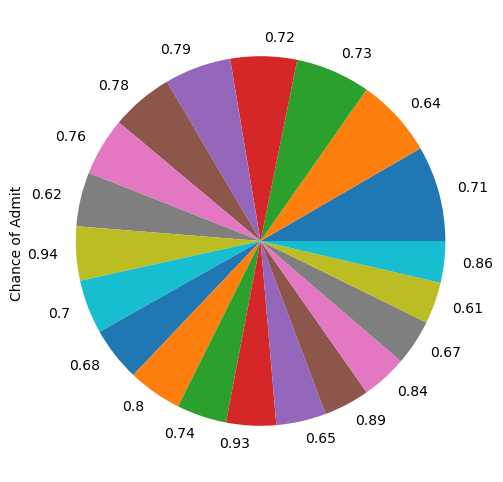

In [37]:
project['Chance of Admit '].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

### Checking relation between Chances of admit and CGPA

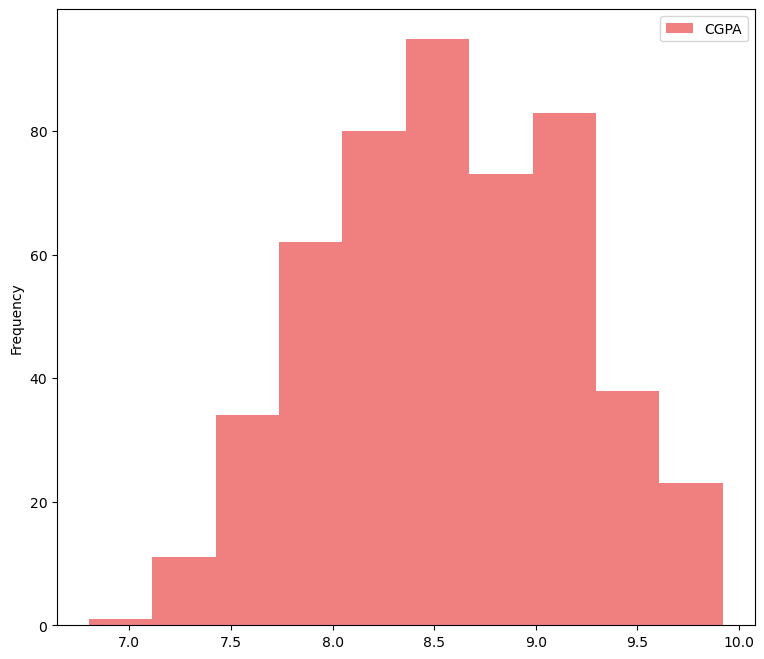

In [38]:
project.plot(x='Chance of Admit ', y='CGPA', kind="hist", figsize=(9, 8), color = 'lightcoral')
plt.show()

### Checking relation between Chances of admit and SOP

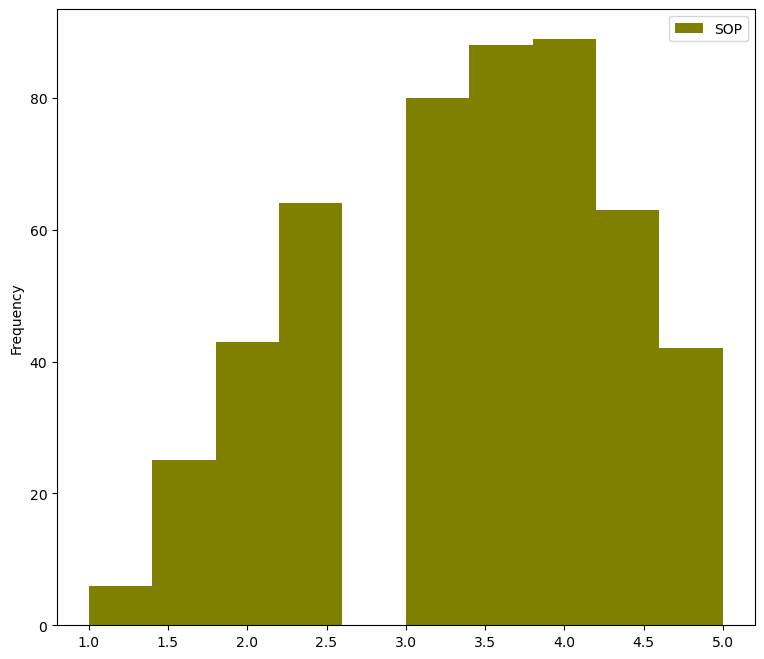

In [39]:
project.plot(x='Chance of Admit ', y='SOP', kind="hist", figsize=(9, 8), color = 'olive')
plt.show()

### Checking relation between Chances of admit and Gre Score

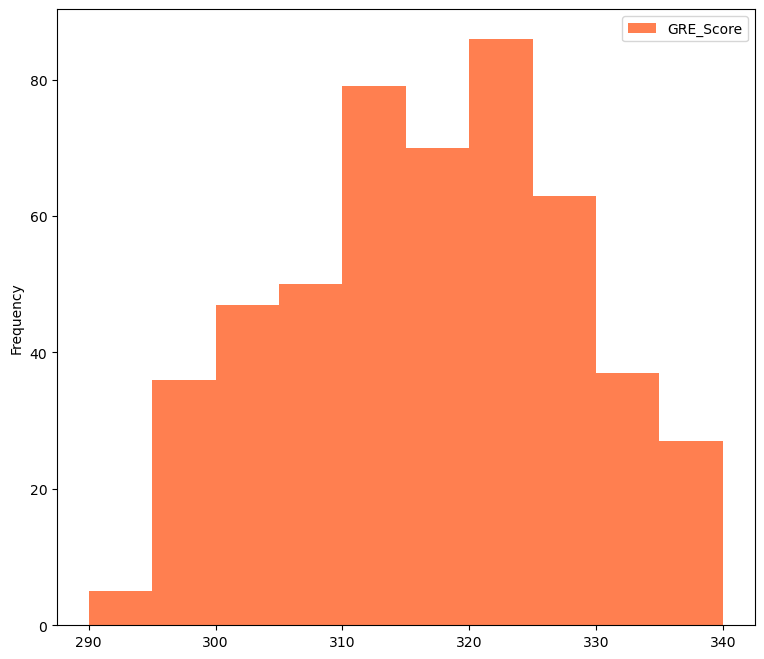

In [40]:
project.plot(x='Chance of Admit ', y='GRE_Score', kind="hist", figsize=(9, 8), color = 'coral')
plt.show()

### Checking relation between Chances of admit and TOEFL Score

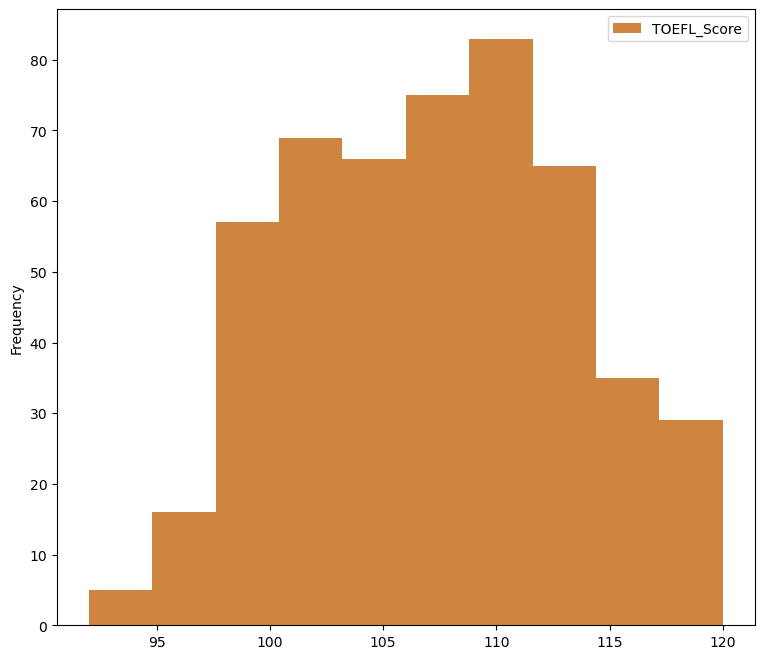

In [42]:
project.plot(x='Chance of Admit ', y='TOEFL_Score', kind="hist", figsize=(9, 8), color = 'peru')
plt.show()

<Axes: xlabel='Chance of Admit ', ylabel='GRE_Score'>

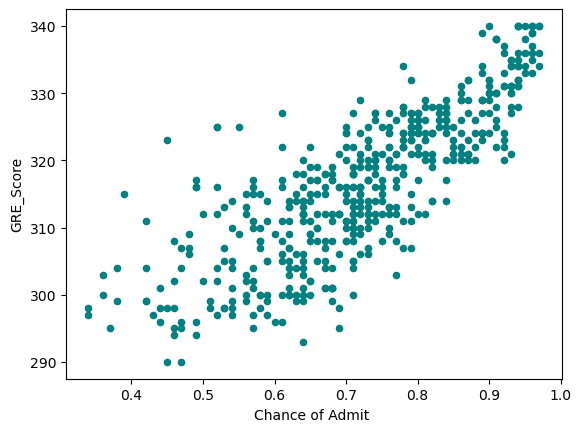

In [43]:
project.plot.scatter('Chance of Admit ','GRE_Score', color = 'teal')

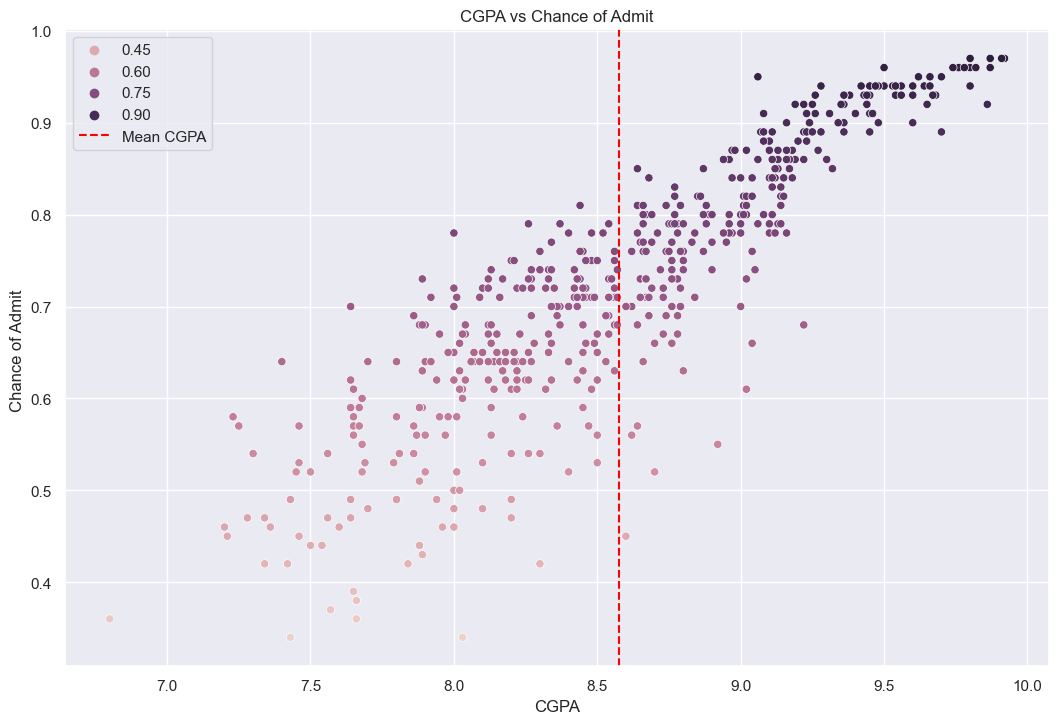

In [99]:
sns.scatterplot(x='CGPA', y='Chance of Admit ', hue='Chance of Admit ', data=project)
plt.axvline(project['CGPA'].mean(), color='red', linestyle='--', label='Mean CGPA')
plt.title('CGPA vs Chance of Admit')
plt.legend()
plt.show()

#### We can see that CGPA also has a good linear relationship with the change of admitance
#### We can say that , to have a good chance of getting admitted you should have a CGPA of more than 8.5
#### We can notice that there is only 1 student who got admitted whose CGPA was less than the average CGPA of all the students (about 8.6) , let us look at that student's record

<Axes: xlabel='Chance of Admit ', ylabel='Research'>

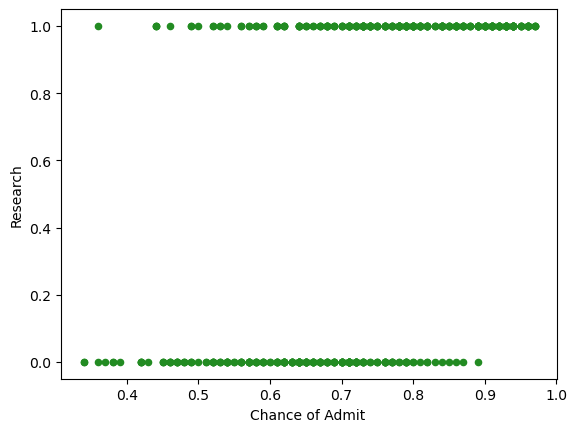

In [44]:
project.plot.scatter('Chance of Admit ','Research', color = 'forestgreen')

#### "Research experience seems to have moderate to high impact on Admit chances."

#### "From Data Analysis, we can say that a Good to moderate GRE and TOEFL score along with research experience can land students with an admit."

### What is the average SOP & LOR Rating of students who got admitted ?

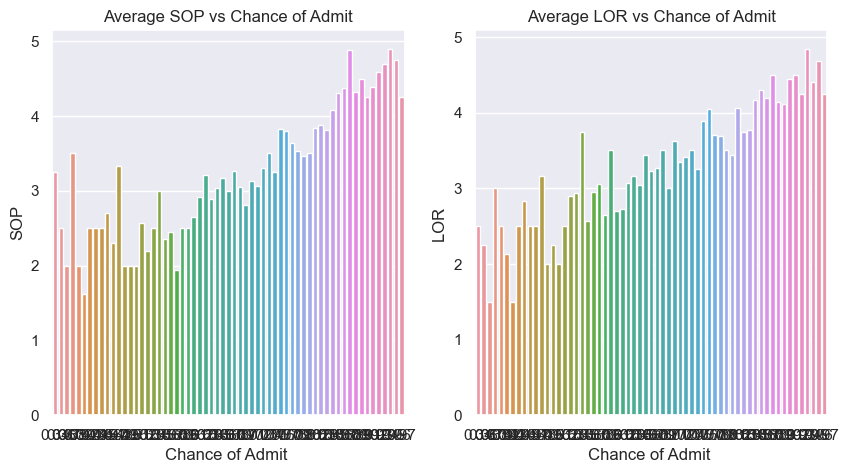

In [96]:
average_ratings = project.groupby('Chance of Admit ')[['SOP', 'LOR ']].mean().reset_index()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for Average SOP vs Chance of Admit
sns.barplot(x='Chance of Admit ', y='SOP', data=average_ratings, ax=ax[0])
ax[0].set_title('Average SOP vs Chance of Admit')

# Bar plot for Average LOR vs Chance of Admit
sns.barplot(x='Chance of Admit ', y='LOR ', data=average_ratings, ax=ax[1])
ax[1].set_title('Average LOR vs Chance of Admit')

plt.show()

#### There is no significant difference in the average GRE & TOEFL scores of the students based on whether the have any Research experience or not
#### We can say that students can score good in GRE & TOEFL even if they dont have any Research experience

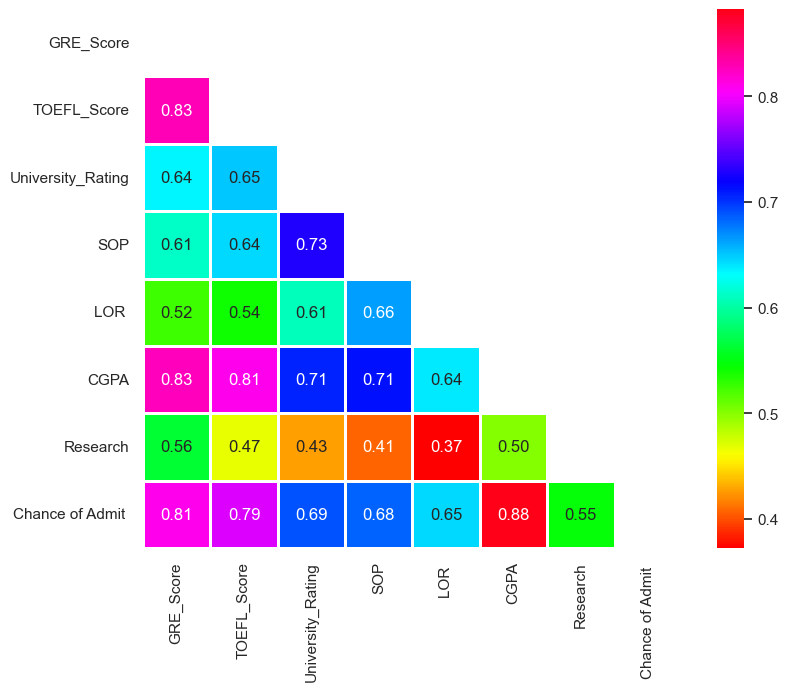

In [74]:
corr = project.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

#### Here we can see that the chance of admit is highly correlated with CGPA, GRE and TOEFEL scores are also correlated.

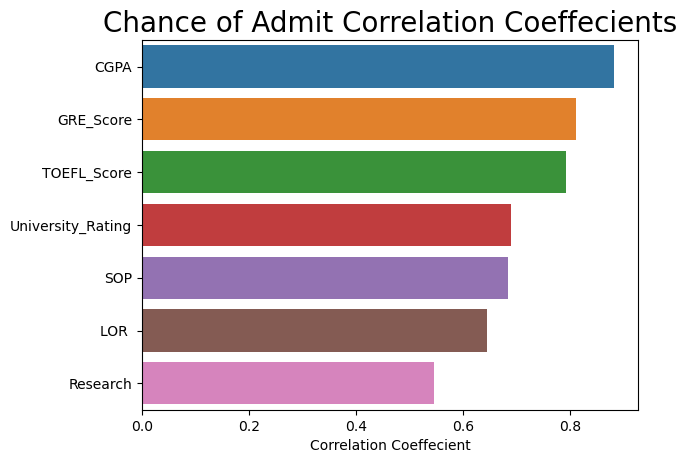

In [55]:
COA_corr = pd.DataFrame(project.corr()['Chance of Admit '])
COA_corr.rename({'Chance of Admit ': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit ', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

#### It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score

In [56]:
COA_corr

,Correlation Coeffecient
CGPA,0.882413
GRE_Score,0.810351
TOEFL_Score,0.792228
University_Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


## <b>6 <span style='color:#0386f7de'>|</span> Data Processing</b>

In [60]:
#Split data into values and labels (Y = Mx + b) M = weights, b = Bias
#x = project.drop('Chance of Admit ', axis = 1)
#y = project['Chance of Admit ']

X = project.drop('Chance of Admit ', axis=1)
y = project['Chance of Admit ']

In [51]:
#Let's make data workable i.e scale the data with simple scaler
# This gives R2 score of about 0.77

from sklearn import preprocessing
x = preprocessing.scale(x)

In [53]:
#Now try scaling with MinMaxScaler
#This helps to increase R2 score (~0.8)

from sklearn.preprocessing import MinMaxScaler

Scale  = MinMaxScaler()

features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

project[features] = Scale.fit_transform(project[features])

project[features]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


In [63]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CGPA','GRE_Score', 'TOEFL_Score']] = scaler.fit_transform(X[['CGPA','GRE_Score', 'TOEFL_Score']])

## Train/Test - Split

In [64]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Linear Regression Model

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [68]:
pd.DataFrame({"Actual": y_test, "Predict": y_test}).head()

,Actual,Predict
18,0.460317,0.460317
361,0.936508,0.936508
104,0.634921,0.634921
4,0.492063,0.492063
156,0.571429,0.571429


In [69]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.8126327365181198 
Linear Regression MSE: 0.008866432286655174, 
Linear Regression RMSE:0.09416173472624204


C:\Users\Hema_Konduru\AppData\Local\Temp\ipykernel_25400\971232948.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


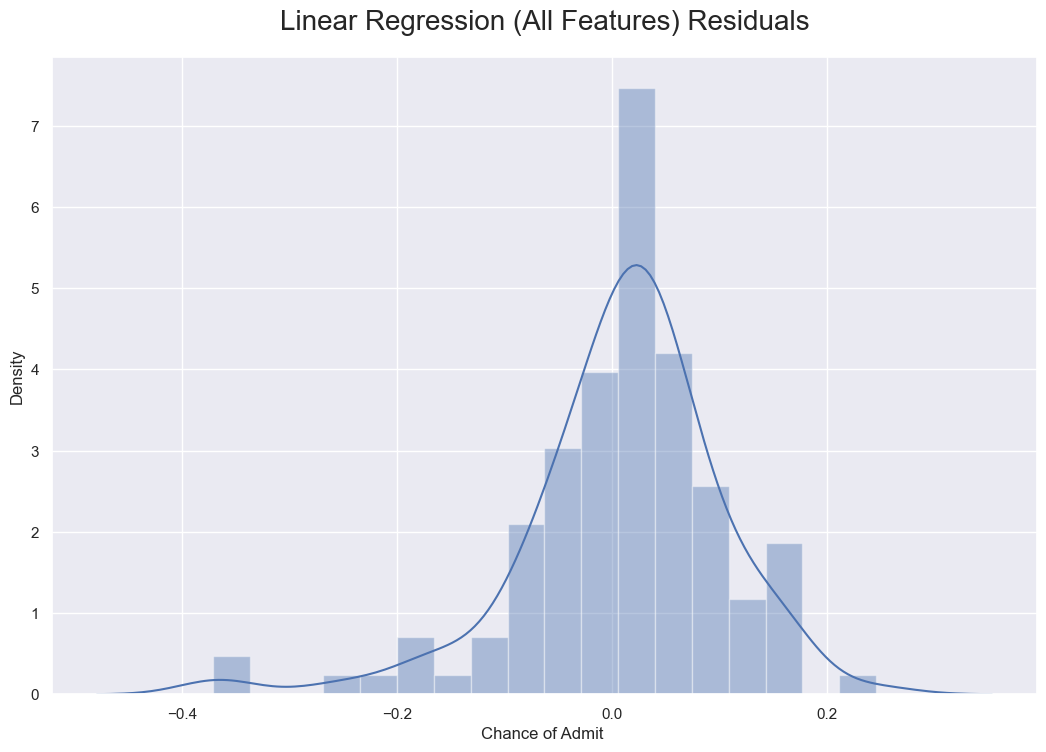

In [70]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test - y_pred))
plt.title('Linear Regression (All Features) Residuals', fontdict={'fontsize':20}, pad=20)
plt.show()

## Prediction Metrics and plots

Mean Squared Error: 0.003967897655580551
R-squared: 0.8059707747882371


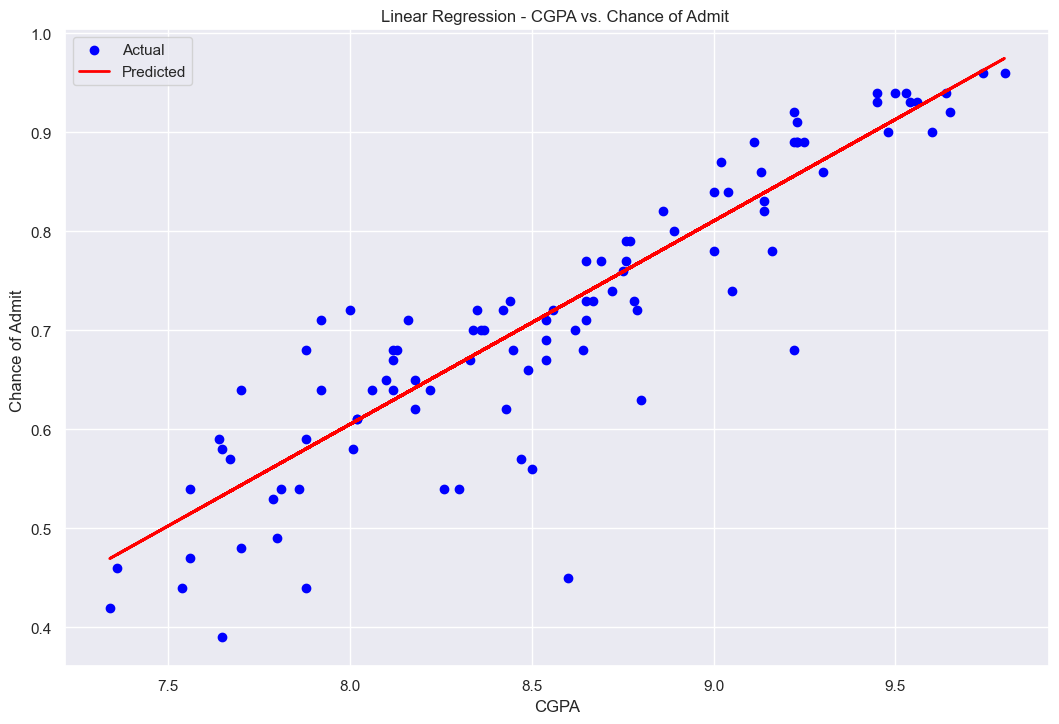

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'admission_data.csv' is in the specified path
file_path = "C:/Users/Hema_Konduru/OneDrive/Desktop/Work/admission_data.csv"
project = pd.read_csv(file_path)

# Let's say you want to predict 'Chance of Admit' based on 'CGPA'
X = project[['CGPA']]  # Feature (Independent variable)
y = project['Chance of Admit ']  # Target (Dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the linear regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression - CGPA vs. Chance of Admit ')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.legend()
plt.show()


#### A R2 Score of 1.0 indicates perfect fit i.e a perfect straight line.
#### Here, we got R2 score near 0.8 that is still pretty good fit to a straight line.

## <b>7 <span style='color:#0386f7de'>|</span> Conclusion</b>

This linear regression model was designed to predict Graduate Admissions, utilizing a dataset that encompasses crucial parameters considered in Masters Programs applications. The dataset includes GRE Scores, TOEFL Scores, University Rating, Statement of Purpose and Letter of Recommendation Strength, Undergraduate GPA, Research Experience, and the target variable, Chance of Admit.

### Key Insights:
Demonstrating notable performance, the model achieved a low Mean Squared Error (MSE) of 0.00397, indicating minimal average squared differences between predicted and actual values.
The R-squared value of 0.806 highlights that approximately 80.6% of the variability in the Chance of Admit is explained by the linear relationship with the specified features.
Practical Significance:

The model's predictive prowess positions it as a valuable tool for assessing prospective graduate students' likelihood of admission.
The adoption of an 80% Chance of Admit threshold provides a practical classification, categorizing candidates as "Admitted" or "Not Admitted" based on their predicted admission probability.

### Recommendations:
While the model demonstrates high accuracy, ongoing validation and improvement efforts are recommended. Exploring additional features or considering more advanced algorithms could further enhance its predictive capabilities.
In the spirit of promoting diversity in admissions, the exploration and inclusion of other pertinent factors for a holistic evaluation of candidates could be considered.

### Overall Implications:
In summary, this linear regression model stands as a robust predictive tool for Graduate Admissions, offering valuable insights into the factors influencing admission probabilities. Its accuracy and practical classification threshold make it a valuable asset in the decision-making process. Continuous refinement and the exploration of additional factors hold the potential to elevate its predictive performance.